# Data Management For Analytics (MSA 8040) Final Project <br>

In [2]:
pip install selenium==3.14.0

  Using cached selenium-3.14.0-py2.py3-none-any.whl (898 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import re
import time
import csv
import json
import random
import requests
import pandas as pd
import numpy as np

from selenium import webdriver #helps in implementing browsers 
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys # give us access to enter and esc keys to send enter or escc keys to page
from selenium.webdriver.common.by import By
import time as tim
from selenium.webdriver.support.ui import WebDriverWait 
#An explicit wait is a code you define to wait for a certain condition to occur before proceeding further in the cod
from selenium.webdriver.support import expected_conditions as EC 

In [7]:
options = webdriver.ChromeOptions()
options.headless = False
browser = webdriver.Chrome(executable_path = '/Users/arunk/Downloads/chromedriver',chrome_options = options)

In [115]:
chrome_options = webdriver.ChromeOptions()
chrome_options.headless = True
browser = webdriver.Chrome(
executable_path = '/Users/arunk/Downloads/chromedriver',
    chrome_options = chrome_options)

In [3]:
tickers_df = pd.read_csv('C:/Users/arunk/Downloads/msa8040_final_project_ticker_list.csv')
tickers_df.head()

,ticker
0,GPC
1,ALV
2,GNTX
3,VNE
4,TOWR


In [301]:
qtr_yr = ['fq3-2021','fq2-2021','fq1-2021','fq4-2020']

In [302]:
tick = str.lower('EHTH')
qtr_yr = 'fq3-2021'
link = 'https://www.estimize.com/'+tick+'/'+qtr_yr+'?metric_name=eps&chart=historical'


In [4]:
import random
random.seed(46)
ticks=random.sample(list(tickers_df.ticker), 50)

### 2a Company Information

In [1079]:
len(ticks)

50

In [1080]:
tick = ticks

tickers=[]
names=[]
sectors=[]
industries=[]
number_of_followers=[]
number_of_analysts=[]

options = webdriver.ChromeOptions()
options.headless = False
browser = webdriver.Chrome(executable_path = '/Users/arunk/Downloads/chromedriver',chrome_options = options)
link = 'https://www.estimize.com/edge'
browser.get(link)

for i in tick:

    search = browser.find_element_by_name('search') #return an object with value name 'search'
    search.send_keys(i) #feed search bar with text in the search bar
    search.send_keys(Keys.RETURN)
    
    time.sleep(3)
    
    ticker = browser. ("//*[@id='releases_show']/div[2]/div[2]/div/div[1]/div/div/div/div[1]/h1/a").text
    tickers.append(ticker)
    name = browser.find_element_by_xpath("//*[@id='releases_show']/div[2]/div[2]/div/div[1]/div/div/div/div[1]/p/a").text
    names.append(name)
    sector =  browser.find_element_by_xpath("//*[@id='releases_show']/div[2]/div[2]/div/div[1]/div/div/div/p/span[1]/a/span").text
    sectors.append(sector)
    ind = browser.find_element_by_xpath('//*[@id="releases_show"]/div[2]/div[2]/div/div[1]/div/div/div/p/span[2]/a/span').text
    industries.append(ind)
    numb_of_followers = browser.find_element_by_xpath("//*[@id='summary-stats']/div/div/div[1]/div[2]").text
    number_of_followers.append(numb_of_followers)
    numb_of_analysts = browser.find_element_by_xpath("//*[@id='summary-stats']/div/div/div[2]/a").text
    number_of_analysts.append(numb_of_analysts)
    
    


In [1082]:
company = pd.DataFrame(list(zip(tickers,names,sectors,industries,number_of_followers,number_of_analysts)),
               columns =['tickers','names','sectors','industries','number_of_followers','number_of_analysts'])

In [1083]:
company

,tickers,names,sectors,industries,number_of_followers,number_of_analysts
0,CVNA,Carvana Co.,Consumer Discretionary,Specialty Retail,71,42
1,FLEX,Flextronics International Ltd.,Information Technology,"Electronic Equip., Instruments",84,132
2,LZB,La-Z-Boy Inc.,Consumer Discretionary,Household Durables,77,212
3,ARNA,"Arena Pharmaceuticals, Inc.",Health Care,Biotechnology,67,81
4,ATI,Allegheny Technologies Inc.,Materials,Metals & Mining,64,124
5,DKL,"Delek Logistics Partners, LP",Energy,"Oil, Gas & Consumable Fuels",12,33
6,UGI,UGI Corp.,Utilities,Gas Utilities,23,73
7,TOUR,Tuniu Corp,Consumer Discretionary,"Hotels, Restaurants & Leisure",23,85
8,NCLH,Norwegian Cruise Line Holdings,Consumer Discretionary,"Hotels, Restaurants & Leisure",167,208
9,M,"Macy's, Inc.",Consumer Discretionary,Multiline Retail,593,775


In [1084]:
company.to_csv('company_info.csv')

### 2b Analysts Predictions Quarterly Extraction

In [1117]:
tick = ticks
df2 = pd.DataFrame(columns = ['ticker','year','Analysts','values','Analyst_id'])
x=['fq3-2021','fq2-2021','fq1-2021','fq4-2020']
for tic in tick:
    for i in x:
        df=pd.DataFrame()
        options = webdriver.ChromeOptions()
        options.headless = False
        browser = webdriver.Chrome(executable_path = '/Users/arunk/Downloads/chromedriver',chrome_options = options)
        link = 'https://www.estimize.com/'+str.lower(tic)+'/'+i+'?metric_name=eps&chart=historical'
        browser.get(link)
        time.sleep(3)
        try:
            browser.find_element_by_xpath('//*[@id="estimates"]/div').click()
        except Exception:
            pass
        df5 = pd.DataFrame()
        df6 = pd.DataFrame()
        t1= browser.find_elements_by_xpath('//*[@id="estimates"]/table/tbody[1]/tr/td/strong')
        t2 =browser.find_elements_by_xpath('//*[@class="estimates-tbl-consensus-column"]/div/strong')
        df5['Analysts'] =  [(i.text) for i in t1]
        df6['Analysts'] =  [(i.text) for i in t2]
        df5 = df5.append(df6,ignore_index=True)
        values = browser.find_elements_by_class_name("estimates-tbl-consensus-eps")
        df5['values'] = [(i.text) for i in values]
        df5['ticker'] = [tic for i in values]
        df5['year'] = [i for j in values]
        df5['Analyst_id'] = ['default' for j in values]
        
        Analysts = browser.find_elements_by_xpath('//strong[@class="user-tooltip-item"]')
        df['Analysts'] = [s.text for s in Analysts]       
        values = browser.find_elements_by_xpath('//td[@class="estimates-tbl-eps"]')
        df['values'] = [s.text for s in values]        
        Analysts_id = browser.find_elements_by_xpath('//p[@class="user-tooltip-item"]')
        df['Analyst_id'] = [s.text for s in Analysts_id]
        df['year'] = [i for s in values]
        df['ticker'] = [tic for s in range(len(values))]
        
        df2 = df2.append(df,ignore_index=True)
        df2 = df2.append(df5,ignore_index=True)
        browser.quit()

In [1119]:
len(df2.Analyst_id.unique())

565

In [1121]:
df2.to_csv('predictions_quarterly.csv')

### 2c Analyst Information Extraction

In [1146]:
analyst_id1=list(df2.Analyst_id.unique())

In [1156]:
df_analysts=pd.DataFrame()
name=[]
analyst_id=[]
roles=[]
join_date=[]
analyst_confidence=[]
error_rate=[]
accuracy_percentile=[]
points=[]
points_estimate=[]
stocks =[]
pending_estimates = []
count=0
for tic in analyst_id1:   
    df=pd.DataFrame()
    options = webdriver.ChromeOptions()
    options.headless = False
    browser = webdriver.Chrome(executable_path = '/Users/arunk/Downloads/chromedriver',chrome_options = options)
    link = 'https://www.estimize.com/users/'+str.lower(tic)
    browser.get(link)
    try:
        names = browser.find_element_by_xpath('//h1[@class="profile-display-name"]').text
        name.append(names)
        analyst_log_id = browser.find_element_by_xpath('//p[@class="profile-username"]').text
        analyst_id.append(analyst_log_id)
        roles_an = browser.find_elements_by_xpath('//ul[@class="profile-bio-categorizations"]/li')
        join_date1 = browser.find_element_by_xpath('//div[@class = "profile-activity-stats"]').text.replace('Member since ', '')
        join_date.append(join_date1)
        analyst_confidence1 = browser.find_element_by_xpath('//*[@id="confidence-wrap"]/div/div[2]').text
        analyst_confidence.append(analyst_confidence1)
        error_rate1 = browser.find_element_by_xpath('//div[@class="profile-stat"]').text.replace('%', '')
        error_rate.append(error_rate1)
        accuracy_percentile1 = browser.find_element_by_xpath('//*[@id="profile-tab-wrap"]/div[1]/div[2]/div[1]').text.replace('%', '')
        accuracy_percentile.append(accuracy_percentile1)
        points1 = browser.find_element_by_xpath('//*[@id="profile-tab-wrap"]/div[2]/div[1]/div[1]').text
        points.append(points1)
        points_estimate1 = browser.find_element_by_xpath('//*[@id="profile-tab-wrap"]/div[2]/div[2]/div[1]').text
        points_estimate.append(points_estimate1)
        stocks1 = browser.find_element_by_xpath('//*[@id="profile-tab-wrap"]/div[3]/div[1]/div[1]').text
        stocks.append(stocks1)
        pending_estimates1 = browser.find_element_by_xpath('//*[@id="profile-tab-wrap"]/div[3]/div[2]/div[1]').text
        pending_estimates.append(pending_estimates1)

        if len(roles_an)==0:
            roles.append('None')
        elif len(roles_an)==1:
            roles1 = browser.find_element_by_xpath('//ul[@class="profile-bio-categorizations"]/li[1]')
            rolen = roles1.text
            roles.append(rolen)

        elif len(roles_an)==2:
            roles1 = browser.find_element_by_xpath('//ul[@class="profile-bio-categorizations"]/li[1]')
            roles2 = browser.find_element_by_xpath('//ul[@class="profile-bio-categorizations"]/li[2]')
            rolen = roles1.text+' , '+roles2.text
            roles.append(rolen)

        elif len(roles_an) ==3:
            roles1 = browser.find_element_by_xpath('//ul[@class="profile-bio-categorizations"]/li[1]')
            roles2 = browser.find_element_by_xpath('//ul[@class="profile-bio-categorizations"]/li[2]')
            roles3 = browser.find_element_by_xpath('//ul[@class="profile-bio-categorizations"]/li[3]')
            rolen = roles1.text+', '+roles2.text+' and '+roles3.text
            roles.append(rolen)
            
        else:
            roles.append('None')

        Analyst_Info = pd.DataFrame(list(zip(name,
                                analyst_id,
                                roles,
                                join_date,
                                analyst_confidence,
                                error_rate,
                                accuracy_percentile,
                                points,
                                points_estimate,
                                stocks ,
                                pending_estimates)),
                               columns =['name','analyst_id','roles','join_date','analyst_confidence','error_rate',
                                'accuracy_percentile','points','points_estimate','stocks','pending_estimates'])
        df_analysts = df_analysts.append(Analyst_Info,ignore_index=True)
    except Exception:
        pass
    browser.quit()

In [1157]:
df_analysts

,name,analyst_id,roles,join_date,analyst_confidence,error_rate,accuracy_percentile,points,points_estimate,stocks,pending_estimates
0,Dominantstock,Dominantstock,"Financial Professional, Buy Side and Asset Man...",Jun 2017 - Last seen 3 months ago,3.2,25.8,21,"-1,041",-7.8,136,215


In [1151]:
new = df_analysts.drop_duplicates().reset_index()


In [1153]:
new = new.drop(columns='index')


In [1158]:
new.to_csv('analysts_info.csv')

### 2c Scored and Pending Stocks of an Analyst

In [1159]:
analyst_ids= list(new.analyst_id.unique())
df_stocks_scored = pd.DataFrame(columns=['Ticker','Quarters','Reported','Rank','Eps_Points','Revenue_Points','Total_Points','Analyst_id'])
df_stocks_pend = pd.DataFrame(columns=['Ticker','Quarter','Reports','Published','EPS','Revenue','Analyst_id'])
for tic in analyst_ids:
    df_stocks_scored1 = pd.DataFrame(columns=['Ticker','Quarters','Reported','Rank','Eps_Points','Revenue_Points','Total_Points'])
    df_stocks_pend1 = pd.DataFrame(columns=['Ticker','Quarter','Reports','Published','EPS','Revenue'])
    options = webdriver.ChromeOptions()
    options.headless = False
    browser = webdriver.Chrome(executable_path = '/Users/arunk/Downloads/chromedriver',chrome_options = options)
    link = 'https://www.estimize.com/users/'+str.lower(tic)
    browser.get(link)
    import time 
    time.sleep(3)  #wait for 3 seconds and then execute the commands
    try:
        browser.find_element_by_xpath("//div[@id='profile-pending-estimates']/div[@class='pagination-footer']").click()
    except Exception:
        pass
    try:
        browser.find_element_by_xpath("//div[@id='profile-scored-estimates']/div[@class='pagination-footer']").click()
    except Exception:
        pass
    df_stocks_scored1['Ticker']= [i.text for i in  browser.find_elements_by_xpath('//*[@id="profile-scored-estimates"]/div[1]/div[2]/a[@class="linked-row"]/div[@class="td"]/strong')]
    df_stocks_scored1['Quarters'] = [i.text for i in browser.find_elements_by_xpath('//*[@id="profile-scored-estimates"]/div[1]/div[2]/a[@class="linked-row"]/div[2]')]
    df_stocks_scored1['Reported'] = [i.text for i in browser.find_elements_by_xpath('//*[@id="profile-scored-estimates"]/div[1]/div[2]/a[@class="linked-row"]/div[3]')]
    df_stocks_scored1['Rank']= [i.text for i in browser.find_elements_by_xpath("//*[@id='profile-scored-estimates']/div[1]/div[2]/a[@class='linked-row']/div[4]")]
    df_stocks_scored1['Eps_Points']=[i.text for i in browser.find_elements_by_xpath("//*[@id='profile-scored-estimates']/div[1]/div[2]/a[@class='linked-row']/div[5]")]
    df_stocks_scored1['Revenue_Points']=[i.text for i in browser.find_elements_by_xpath("//*[@id='profile-scored-estimates']/div[1]/div[2]/a[@class='linked-row']/div[6]")]
    df_stocks_scored1['Total_Points']=[i.text for i in browser.find_elements_by_xpath("//*[@id='profile-scored-estimates']/div[1]/div[2]/a[@class='linked-row']/div[7]")]
    df_stocks_scored1['Analyst_id']=[tic]*len(browser.find_elements_by_xpath('//*[@id="profile-scored-estimates"]/div[1]/div[2]/a[@class="linked-row"]/div[@class="td"]/strong'))
    
    df_stocks_pend1['Ticker'] = [i.text for i in browser.find_elements_by_xpath('//*[@id="profile-pending-estimates"]/div[1]/div[2]/a[@class="linked-row"]/div[1]')]
    df_stocks_pend1['Quarter'] = [i.text for i in browser.find_elements_by_xpath('//*[@id="profile-pending-estimates"]/div[1]/div[2]/a[@class="linked-row"]/div[2]')]
    df_stocks_pend1['Reports'] = [i.text for i in browser.find_elements_by_xpath('//*[@id="profile-pending-estimates"]/div[1]/div[2]/a[@class="linked-row"]/div[3]')]
    df_stocks_pend1['Published'] = [i.text for i in browser.find_elements_by_xpath('//*[@id="profile-pending-estimates"]/div[1]/div[2]/a[@class="linked-row"]/div[4]')]
    df_stocks_pend1['EPS'] = [i.text for i in browser.find_elements_by_xpath('//*[@id="profile-pending-estimates"]/div[1]/div[2]/a[@class="linked-row"]/div[5]')]
    df_stocks_pend1['Revenue'] = [i.text for i in browser.find_elements_by_xpath('//*[@id="profile-pending-estimates"]/div[1]/div[2]/a[@class="linked-row"]/div[6]')]
    df_stocks_pend1['Analyst_id']=[tic]*len(browser.find_elements_by_xpath("//*[@id='profile-pending-estimates']/div[1]/div[2]/a[@class='linked-row']/div[1]"))
    
    df_stocks_scored = df_stocks_scored.append(df_stocks_scored1,ignore_index=True)
    df_stocks_pend=df_stocks_pend.append(df_stocks_pend1,ignore_index=True)
    browser.quit()

In [1162]:
df_stocks_scored.to_csv('stocks_scored.csv')

In [1163]:
df_stocks_pend.to_csv('stocks_pending.csv')

### 2C Stocks Covered by Analysts

In [1192]:
analyst_ids=list(new.analyst_id.unique())
len(analyst_ids)

233

In [1196]:
analyst_ids=list(new.analyst_id.unique())
df_stocks_cov = pd.DataFrame(columns=['Ticker','Reports','Quarters','Points','Pts_Est','Error_Rate','Accuracy','Analyst_id'])
    
for tic in analyst_ids:
    df_stocks_cov1 = pd.DataFrame()
    options = webdriver.ChromeOptions()
    options.headless = False
    browser = webdriver.Chrome(executable_path = '/Users/arunk/Downloads/chromedriver',chrome_options = options)
    link = 'https://www.estimize.com/users/'+str.lower(tic)
    browser.get(link)
    browser.execute_script("window.scrollTo(0, window.scrollY + 1300)") #scrolling to a particular height
    time.sleep(5)
    try:
        browser.find_element_by_xpath('//*[@id="profile-covered-stocks"]/div[2]').click()
    except Exception:
        pass

    df_stocks_cov1['Ticker']= [i.text for i in browser.find_elements_by_xpath('//*[@id="profile-covered-stocks"]/div[1]/div[2]/div/div[1]')]
    
    df_stocks_cov1['Reports'] = [i.text for i in browser.find_elements_by_xpath('//*[@id="profile-covered-stocks"]/div[1]/div[2]/div/div[2]')]
    df_stocks_cov1['Quarters'] = [i.text for i in browser.find_elements_by_xpath('//*[@id="profile-covered-stocks"]/div[1]/div[2]/div/div[3]')]
    df_stocks_cov1['Points'] = [i.text for i in browser.find_elements_by_xpath('//*[@id="profile-covered-stocks"]/div[1]/div[2]/div/div[4]')]
    df_stocks_cov1['Error_Rate'] = [i.text.replace('%','') for i in browser.find_elements_by_xpath('//*[@id="profile-covered-stocks"]/div[1]/div[2]/div/div[6]')]
    df_stocks_cov1['Accuracy'] = [i.text.replace('%','') for i in browser.find_elements_by_xpath('//*[@id="profile-covered-stocks"]/div[1]/div[2]/div/div[7]')]
    df_stocks_cov1['Analyst_id'] = [tic]*len(browser.find_elements_by_xpath('//*[@id="profile-covered-stocks"]/div[1]/div[2]/div/div[1]'))
    df_stocks_cov1['Pts_Est'] = [i.text for i in browser.find_elements_by_xpath('//*[@id="profile-covered-stocks"]/div[1]/div[2]/div/div[5]')]

    df_stocks_cov = df_stocks_cov.append(df_stocks_cov1,ignore_index=True)
    print(df_stocks_cov1.shape)
    print(df_stocks_cov.shape)
    browser.quit()


(30, 8)
(30, 8)
(1, 8)
(31, 8)
(30, 8)
(61, 8)
(21, 8)
(82, 8)
(30, 8)
(112, 8)
(0, 8)
(112, 8)
(1, 8)
(113, 8)
(1, 8)
(114, 8)
(30, 8)
(144, 8)
(30, 8)
(174, 8)
(2, 8)
(176, 8)
(0, 8)
(176, 8)
(5, 8)
(181, 8)
(1, 8)
(182, 8)
(1, 8)
(183, 8)
(30, 8)
(213, 8)
(16, 8)
(229, 8)
(30, 8)
(259, 8)
(1, 8)
(260, 8)
(1, 8)
(261, 8)
(1, 8)
(262, 8)
(30, 8)
(292, 8)
(30, 8)
(322, 8)
(30, 8)
(352, 8)
(30, 8)
(382, 8)
(30, 8)
(412, 8)
(30, 8)
(442, 8)
(30, 8)
(472, 8)
(30, 8)
(502, 8)
(30, 8)
(532, 8)
(30, 8)
(562, 8)
(12, 8)
(574, 8)
(30, 8)
(604, 8)
(12, 8)
(616, 8)
(0, 8)
(616, 8)
(0, 8)
(616, 8)
(7, 8)
(623, 8)
(8, 8)
(631, 8)
(10, 8)
(641, 8)
(20, 8)
(661, 8)
(5, 8)
(666, 8)
(30, 8)
(696, 8)
(1, 8)
(697, 8)
(30, 8)
(727, 8)
(11, 8)
(738, 8)
(3, 8)
(741, 8)
(29, 8)
(770, 8)
(1, 8)
(771, 8)
(1, 8)
(772, 8)
(1, 8)
(773, 8)
(2, 8)
(775, 8)
(0, 8)
(775, 8)
(0, 8)
(775, 8)
(1, 8)
(776, 8)
(13, 8)
(789, 8)
(30, 8)
(819, 8)
(0, 8)
(819, 8)
(30, 8)
(849, 8)
(1, 8)
(850, 8)
(30, 8)
(880, 8)
(30, 8)
(910

In [1197]:
# for i in browser.find_elements_by_xpath('//*[@id="profile-covered-stocks"]/div[1]/div[2]/div/div[4]'):
#     print(i.text)
df_stocks_cov.shape

(2806, 8)

In [1198]:
df_stocks_cov.to_csv('stocks_covered.csv')

# Connection to Database

In [341]:
!pip3 install ipython-sql
!pip3 install mysqlclient
!pip install pymysql

In [748]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', user='root',  
                        password='NatiAug!#10')#give ur username, password
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("CREATE DATABASE Estimize")
        print("Database is created")
except Error as e:
    print("Error while connecting to MySQL", e)

Database is created


In [ ]:
## Commpany Info Insertion

In [23]:
company_info = pd.read_csv('C:/Users/arunk/Downloads/DM_Project_Files/company_info.csv')

In [24]:
company_info

,tickers,names,sectors,industries,number_of_followers,number_of_analysts
0,CVNA,Carvana Co.,Consumer Discretionary,Specialty Retail,71,42
1,FLEX,Flextronics International Ltd.,Information Technology,"Electronic Equip., Instruments",84,132
2,LZB,La-Z-Boy Inc.,Consumer Discretionary,Household Durables,77,212
3,ARNA,"Arena Pharmaceuticals, Inc.",Health Care,Biotechnology,67,81
4,ATI,Allegheny Technologies Inc.,Materials,Metals & Mining,64,124
5,DKL,"Delek Logistics Partners, LP",Energy,"Oil, Gas & Consumable Fuels",12,33
6,UGI,UGI Corp.,Utilities,Gas Utilities,23,73
7,TOUR,Tuniu Corp,Consumer Discretionary,"Hotels, Restaurants & Leisure",23,85
8,NCLH,Norwegian Cruise Line Holdings,Consumer Discretionary,"Hotels, Restaurants & Leisure",167,208
9,M,"Macy's, Inc.",Consumer Discretionary,Multiline Retail,593,775


### creation and insertion of data into "company_info" table

In [27]:
import mysql.connector as msql
from mysql.connector import Error
try:
    connection = msql.connect(host='localhost', database='estimize', user='root', password='*******')
    if connection.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("Connected: ", record)
        cursor.execute('DROP TABLE IF EXISTS company_info;')
        print('Creating table')

        cursor.execute("CREATE TABLE company_info(tickers varchar(255) PRIMARY KEY,names varchar(255),sectors varchar(255),industries varchar(255),number_of_followers int,number_of_analysts int)")
        print("Table created")
  
        for values,row in company_info.iterrows():            
            sql = "INSERT INTO estimize.company_info VALUES (%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            conn.commit()
except Error as e:
            print("Conection Error", e)

You're connected to database:  ('estimize',)
Creating table....
Table is created....


### Data pre-processing of predictions_quarterly before loading the data into the database

In [28]:
import pandas as pd

In [6]:
predictions_quarterly = pd.read_csv('C:/Users/arunk/Downloads/DM_Project_Files/predictions_quarterly_keerthi.csv')

In [7]:
predictions_quarterly.head()

,ticker,year,Analysts,value,Analyst_id
0,CVNA,fq3-2021,"Brian Nagel, CFA",-0.40,Oppenheimer_26
1,CVNA,fq3-2021,Dominantstock,-0.29,Dominantstock
2,CVNA,fq3-2021,Analyst_9769330,-0.29,Analyst_9769330
3,CVNA,fq3-2021,Bill,-0.24,BillB1210
4,CVNA,fq3-2021,Analyst_9630672,-0.18,Analyst_9630672


In [13]:
p=re.compile(r'-')
xa=[]
for x in predictions_quarterly['value']:
    if x =='-':
        a=x.replace('-','')
        xa.append(a)
    else:
        xa.append(x)

predictions_quarterly['est_value']=xa

In [14]:
predictions_quarterly['est_value'].fillna(0, inplace = True)

In [15]:
predictions_quarterly = predictions_quarterly.drop(columns='value')
predictions_quarterly = predictions_quarterly.rename(columns ={'est_value':'value'})


In [30]:
predictions_quarterly

,ticker,year,Analysts,value,Analyst_id
0,CVNA,fq3-2021,"Brian Nagel, CFA",-0.40,Oppenheimer_26
1,CVNA,fq3-2021,Dominantstock,-0.29,Dominantstock
2,CVNA,fq3-2021,Analyst_9769330,-0.29,Analyst_9769330
3,CVNA,fq3-2021,Bill,-0.24,BillB1210
4,CVNA,fq3-2021,Analyst_9630672,-0.18,Analyst_9630672
...,...,...,...,...,...
2460,NKTR,fq4-2020,"Jay Olson, CFA",-0.80,Oppenheimer_52
2461,NKTR,fq4-2020,NKTR Reported Earnings,-0.65,default
2462,NKTR,fq4-2020,Estimize Consensus,-0.62,default
2463,NKTR,fq4-2020,Estimize Mean,-0.65,default


### creation and insertion of data into "predictions_quarterly" table

In [31]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='estimize', user='root', password='NatiAug!#10')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS predictions_quarterly;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to create
        cursor.execute("CREATE TABLE predictions_quarterly(ticker varchar(255),year varchar(255),Analysts varchar(255),value float(8,3),Analyst_id varchar(255), FOREIGN KEY(ticker) REFERENCES  company_info(tickers))")
        print("Table is created....")
        #loop through the data frame
        for i,row in predictions_quarterly.iterrows():
            #here %S means string values 
            sql = "INSERT INTO estimize.predictions_quarterly VALUES (%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            #print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
except Error as e:
            print("Error while connecting to MySQL", e)

connected to database:  ('estimize',)
Creating table....
Table is created....


In [32]:
import pandas as pd
analysts_info = pd.read_csv('C:/Users/arunk/Downloads/DM_Project_Files/analysts_info_keerthi.csv')

In [13]:
analysts_info.head(2)

,name,analyst_id,roles,join_date,analyst_confidence,error_rate,accuracy_percentile,points,points_estimate,stocks,pending_estimates
0,Dominantstock,Dominantstock,"Financial Professional, Buy Side and Asset Man...",Jun 2017 - Last seen 3 months ago,3.2,25.8,21,-1041.0,-7.8,136.0,215
1,Analyst_9769330,Analyst_9769330,"Non Professional, Other and Other",Sep-21,7.2,15.1,76,15.0,15.0,1.0,1


### creation and insertion of data into "analysts_info" table

In [33]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='estimize', user='root', password='NatiAug!#10')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS analyst_info;')
        print('Creating table....')
        cursor.execute("CREATE TABLE analyst_info(name varchar(255),analyst_id varchar(255),roles varchar(255),join_date varchar(255),analyst_confidence float(3,2),error_rate float(5,2),accuracy_percentile int, points float(8,3) ,points_estimate float(8,3), stocks int, pending_estimates int,Primary key (analyst_id))")

        for i,row in analysts_info.iterrows():
            #here %S means string values 
            sql = "INSERT INTO estimize.analyst_info VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            
            conn.commit()
except Error as e:
            print("Error while connecting to MySQL", e)
        

You're connected to database:  ('estimize',)
Creating table....
Table is created....


### creation and insertion of data into "stocks_scored" table

In [34]:
import pandas as pd

stocks_scored = pd.read_csv('C:/Users/arunk/Downloads/DM_Project_Files/stocks_scored_keerthi.csv')
stocks_scored

,Ticker,Quarters,Reported,Rank_scored,Eps_Points,Revenue_Points,Total_Points,Analyst_id,composite_keys
0,PD,Q3 2022,7-Dec-21,9/9,-11,-13,-24,Dominantstock,dominantstockpdQ32022
1,AVAV,Q2 2022,7-Dec-21,3/9,12,-4,8,Dominantstock,dominantstockavavQ22022
2,MDB,Q3 2022,6-Dec-21,23 / 25,8,-7,1,Dominantstock,dominantstockmdbQ32022
3,OLLI,Q3 2021,2-Dec-21,11/11,-7,-6,-13,Dominantstock,dominantstockolliQ32021
4,VEEV,Q3 2022,1-Dec-21,19 / 24,9,-6,3,Dominantstock,dominantstockveevQ32022
...,...,...,...,...,...,...,...,...,...
5564,KPTI,Q1 2021,3-May-21,3/9,18,21,39,Canaccord_202,canaccord_202kptiQ12021
5565,BPMC,Q1 2021,29-Apr-21,2/2,11,-4,7,Canaccord_202,canaccord_202bpmcQ12021
5566,CRSP,Q1 2021,27-Apr-21,5/13,0,11,11,Canaccord_202,canaccord_202crspQ12021
5567,NKTR,Q1 2021,6-May-21,5/8,7,-1,6,Analyst_8423568,analyst_8423568nktrQ12021


In [35]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='estimize', user='root', password='NatiAug!#10')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS stocks_scored;')
        print('Creating table....')
        cursor.execute("CREATE TABLE stocks_scored(ticker varchar(255),quarters varchar(255),reported varchar(255),rank_scored varchar(255),eps_points float(5,2),revenue_points float(5,2),total_points int, analyst_id varchar(255),composite_keys varchar(255),primary key (composite_keys) )")
        print("Table is created....")

        for i,row in stocks_scored.iterrows():
             
            sql = "INSERT INTO estimize.stocks_scored VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))            
            conn.commit()
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('estimize',)
Creating table....
Table is created....


### creation and insertion of data into "Stocks_pending" table

In [36]:
import pandas as pd

stocks_pending = pd.read_csv('C:/Users/arunk/Downloads/DM_Project_Files/stocks_pending_keerthi.csv')
stocks_pending

stocks_pending = stocks_pending.where((pd.notnull(stocks_pending)), None)

In [37]:
stocks_pending

,Ticker,Quarter,Reports,Published,EPS,Revenue,Analyst_id,stocks_pending_composite
0,FIZZ,Q2 2022,"Dec 9, 2021 BMO","Mar 5, 2021 278 days ago",0.52,283.76,Dominantstock,dominantstockfizzQ22022
1,CIEN,Q4 2021,"Dec 9, 2021 BMO","Jan 27, 2021 315 days ago",0.92,1036.0,Dominantstock,dominantstockcienQ42021
2,MTN,Q1 2022,"Dec 9, 2021 AMC","Apr 22, 2021 230 days ago",-2.8,252.26,Dominantstock,dominantstockmtnQ12022
3,GRUB,Q3 2021,"Dec 10, 2021 AMC","Nov 4, 2020 399 days ago",0.28,560.13,Dominantstock,dominantstockgrubQ32021
4,TTC,Q4 2021,"Dec 15, 2021 BMO","Aug 4, 2021 126 days ago",0.65,868.43,Dominantstock,dominantstockttcQ42021
...,...,...,...,...,...,...,...,...
1611,CRSP,Q3 2022,"Nov 2, 2022 AMC","Aug 13, 2021 117 days ago",-1.8,6.4,Canaccord_202,canaccord_202crspQ32022
1612,HALO,Q3 2022,"Nov 7, 2022 AMC",1-Dec-21,0.35,103.3,Canaccord_202,canaccord_202haloQ32022
1613,HALO,Q4 2022,"Feb 27, 2023 AMC",1-Dec-21,0.35,103.81,Canaccord_202,canaccord_202haloQ42022
1614,BPMC,Q4 2022,"Mar 10, 2023 BMO","Jun 17, 2021 174 days ago",0.55,139.6,Canaccord_202,canaccord_202bpmcQ42022


In [38]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='estimize', user='root', password='NatiAug!#10')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS stocks_pending;')
        print('Creating table....')
        cursor.execute("CREATE TABLE stocks_pending(ticker varchar(255),quarter varchar(255),reports varchar(255),published varchar(255),eps float(25,2),revenue float(25,2), analyst_id varchar(255),stocks_pending_composite varchar(255),primary key(stocks_pending_composite))")
        print("Table is created....")

        for i,row in stocks_pending.iterrows():
            #here %S means string values 
            sql = "INSERT INTO estimize.stocks_pending VALUES (%s,%s,%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            #print("Record inserted")
            
            conn.commit()
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('estimize',)
Creating table....
Table is created....


### creation and insertion of data into "stocks_covered" tabl

In [39]:
import pandas as pd

stocks_covered = pd.read_csv('C:/Users/arunk/Downloads/DM_Project_Files/stocks_covered_keerthi.csv')
stocks_covered

,Ticker,Reports,Quarters,Points,Pts_Est,Error_Rate,Accuracy,Analyst_id
0,AAPL,1-Feb,16,-125,-7.8,11.8,20,Dominantstock
1,JBT,22-Feb,16,73,4.6,10.1,27,Dominantstock
2,VEEV,1-Mar,15,-61,-4.1,8.7,16,Dominantstock
3,CAT,27-Jan,15,-254,-16.9,19.6,13,Dominantstock
4,BABA,2-Feb,15,23,1.5,11.7,40,Dominantstock
...,...,...,...,...,...,...,...,...
4174,BPMC,11-Mar,4,62,13.8,19.4,45,Canaccord_202
4175,CRSP,11-Mar,2,15,6.0,74.0,60,Canaccord_202
4176,BNTX,5-Apr,1,-10,-10.0,19.9,30,Canaccord_202
4177,NKTR,3-Mar,1,6,6.0,8.1,56,Analyst_8423568


In [40]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='estimize', user='root', password='NatiAug!#10')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS stocks_covered;')
        
        cursor.execute("CREATE TABLE stocks_covered(ticker varchar(255),reports varchar(255),Quarters int,points int,pts_est float(5,2),error_rate float(5,2), accuracy int,analyst_id varchar(255))")
        print("Table is created....")

        for i,row in stocks_covered.iterrows():
            #here %S means string values 
            sql = "INSERT INTO estimize.stocks_covered VALUES (%s,%s,%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            #print("Record inserted")
            
            conn.commit()
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('estimize',)
Table is created....


### Table size information

In [52]:
print ('company_info',company_info.shape)
print ('predictions_quarterly',predictions_quarterly.shape)
print('analysts_info',analysts_info.shape)
print('stocks_covered',stocks_covered.shape)
print('stocks_pending',stocks_pending.shape)
print('stocks_scored',stocks_scored.shape)

company_info (50, 6)
predictions_quarterly (2465, 5)
analysts_info (356, 11)
stocks_covered (4179, 8)
stocks_pending (1616, 8)
stocks_scored (5569, 9)


# ---------------------- BONUS -----------------------------------

### Regression Analysis

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
data=pd.read_csv(u"Analysts_Info.csv",encoding='latin-1')

In [64]:

data

,AnalystID,Name,Role,Analyst_Confidence Score,Error_rate,Accuracy_Percentile,Points,Points_Estimate,Stocks,Pending,Join_Date
0,analyst_9404487,Rasun,NaN,7.8,0.18,0.58,1651.0,10.0,141.0,162.0,Jul 2019
1,analyst_6216740,Analyst_6216740,Non Professional Information Technology Commun...,7.3,0.15,0.55,517.0,15.0,30.0,35.0,Jul 2015
2,analyst_530056,Analyst_530056,NaN,5.5,0.16,0.41,3029.0,6.0,67.0,513.0,Jun 2017
3,analyst_8278771,Analyst_8278771,Non Professional Other Other,6.9,0.05,0.76,41.0,41.0,1.0,1.0,Jun 2020
4,analyst_9872866,Analyst_9872866,Non Professional Other Other,7.0,0.12,0.53,203.0,10.0,20.0,20.0,May 2020
...,...,...,...,...,...,...,...,...,...,...,...
8759,htran86,Htran86,Non Professional Student,6.7,0.13,0.39,17.0,17.0,1.0,1.0,Nov 2021
8760,analyst_6931215,Analyst_6931215,Non Professional Other Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nov 2021
8761,analyst_3638872,Analyst_3638872,Non Professional Other Other,6.8,0.09,0.53,41.0,21.0,2.0,2.0,Nov 2021
8762,analyst_9401163,Analyst_9401163,Non Professional Other Other,6.7,0.13,0.38,17.0,17.0,1.0,1.0,Nov 2021


In [108]:
x=data[['Analyst_Confidence Score','Accuracy_Percentile','Stocks','Pending','Error_rate']]

In [66]:
x.dropna(inplace=True)

C:\Users\dudey\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [114]:
x.iloc[:,0].mean()

6.665919959728258

<AxesSubplot:xlabel='[Analysts]', ylabel='Confidence Score'>

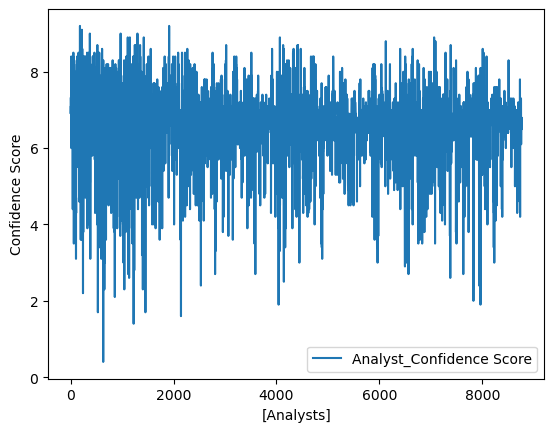

In [107]:
plot_data=pd.DataFrame(data.dropna()).loc[:,['AnalystID','Analyst_Confidence Score']]
plot_data.plot(kind='line',ylabel='Confidence Score',xlabel=['Analysts'])

In [43]:
corr=x.corr()

<AxesSubplot:>

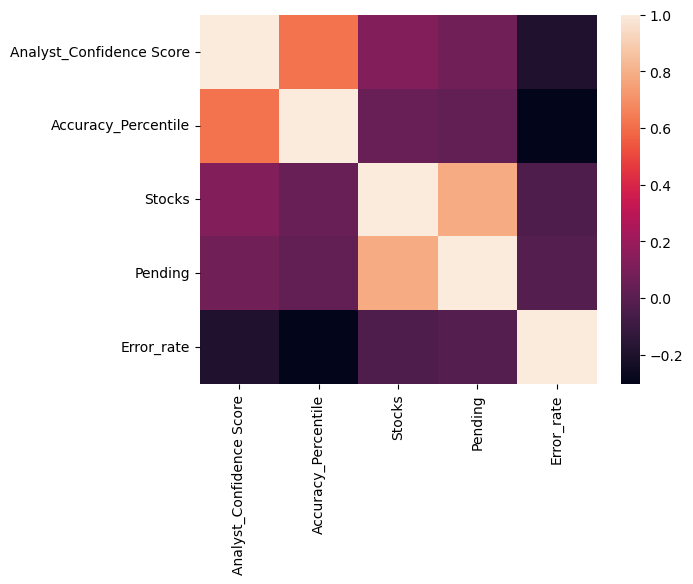

In [45]:
import seaborn as sns
%matplotlib inline
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

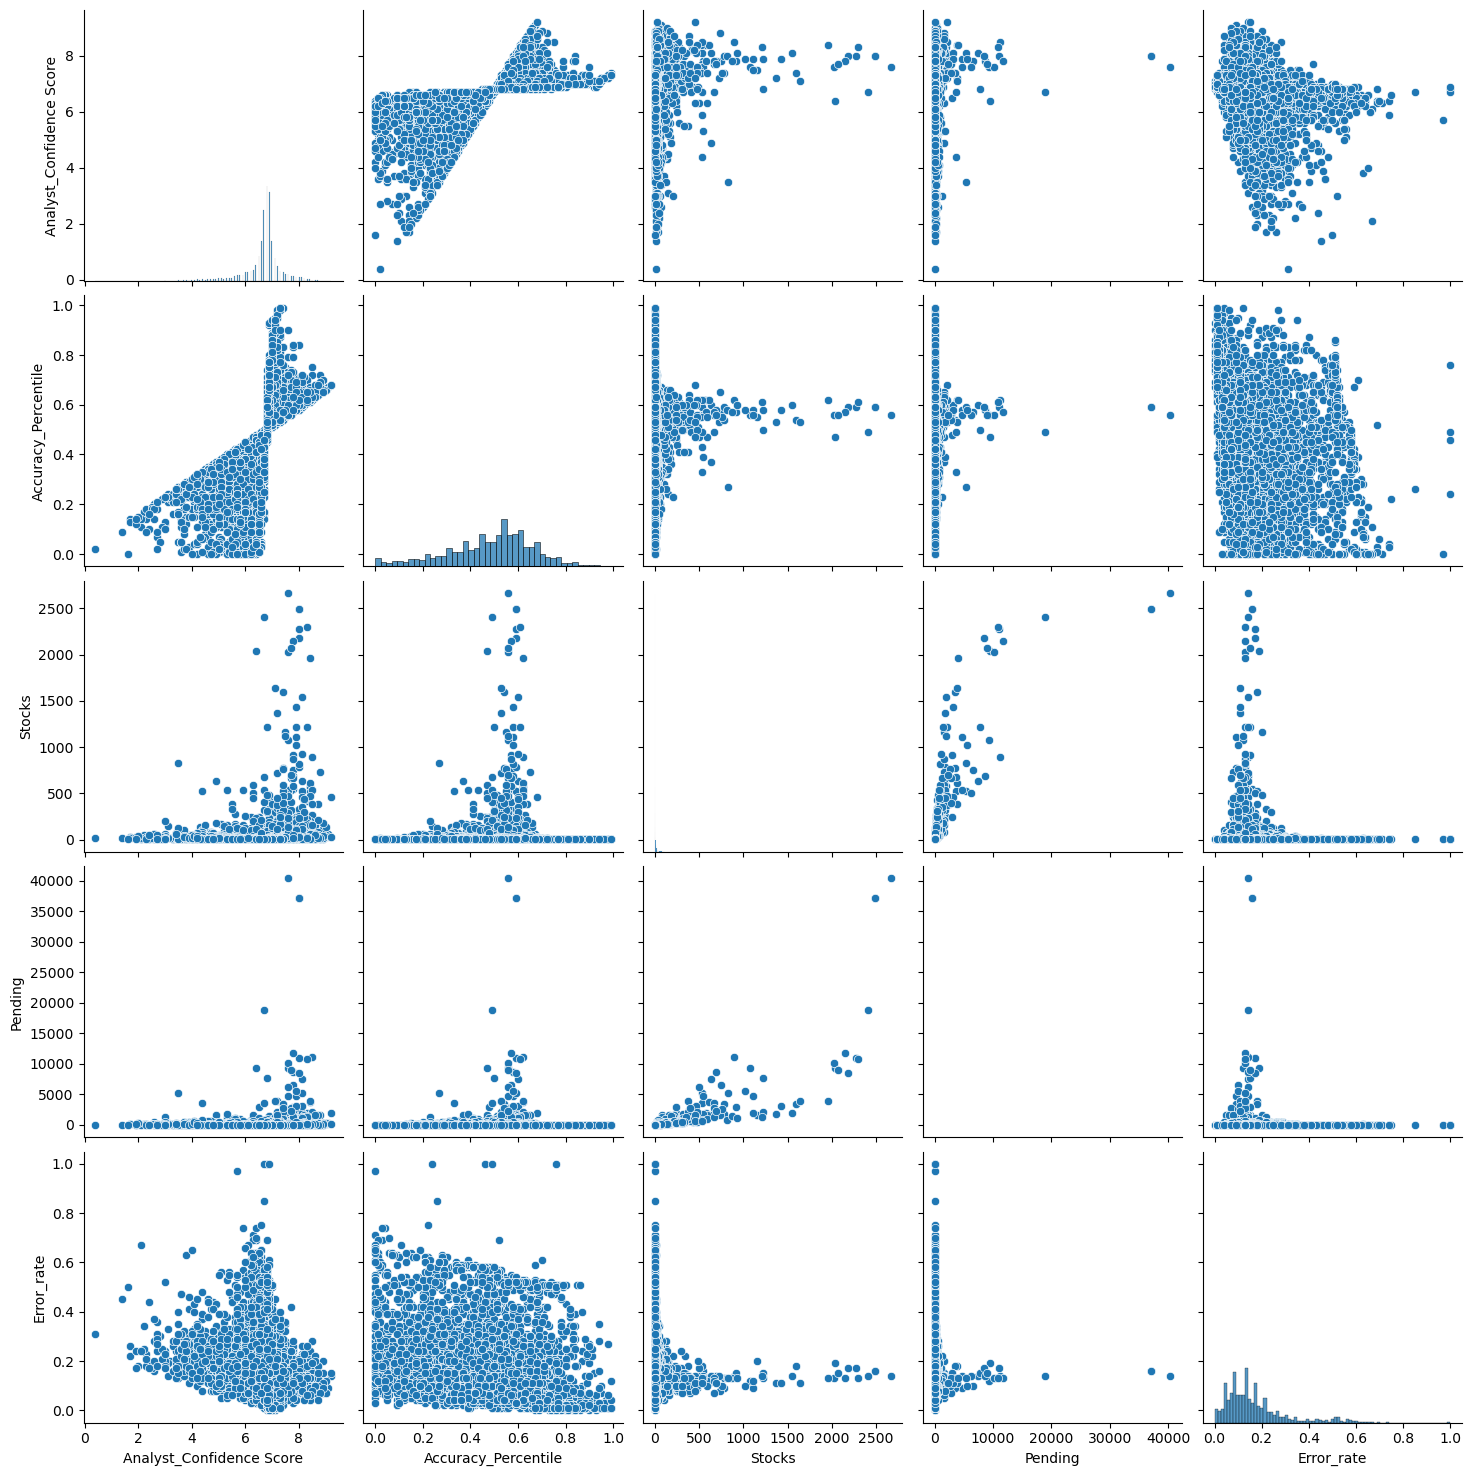

In [60]:
sns.pairplot(data=x[:,0:], height=3)

In [67]:
x=data[['Analyst_Confidence Score','Accuracy_Percentile','Stocks','Pending']]
y=x[['Error_rate']]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=53,test_size=0.3)

### Scaling using Standard Scaler

In [36]:
# Normalising the data is also an option

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression  # Import Linear Regression model
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt 
linear_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
linear_reg.fit(X_train, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [38]:
y_pred_LR_train = linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_LR_test = linear_reg.predict(X_test)

In [39]:
accuracy_LR_train = r2_score(y_train, y_pred_LR_train)

# Find testing accuracy for this model:
accuracy_LR_test = r2_score(y_test, y_pred_LR_test)
print("Testing Accuracy for Linear Regression Model: ", accuracy_LR_test)

# Find RMSE for testing data:
RMSE_LR_test = sqrt(mean_squared_error(y_test, y_pred_LR_test))
print("RMSE for Testing Data: ", RMSE_LR_test)



Testing Accuracy for Linear Regression Model:  -0.5915782800155704
RMSE for Testing Data:  0.16683926645091696


### Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regression model

random_forest_reg = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=13)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

C:\Users\dudey\AppData\Local\Temp/ipykernel_23816/1492083408.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_reg.fit(X_train, y_train)  # Fit data to the model


RandomForestRegressor(max_depth=2, random_state=13)

In [41]:
# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)


# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

Testing Accuracy for Random Forest Regression Model:  0.9122423561137754
RMSE for Testing Data:  0.03917660043431979
